<a href="https://colab.research.google.com/github/Dhanushtg/Bank-Loan-Analysis-SQL/blob/main/Bank%20Loan%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/loanfile-2.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:


df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:

print(df.isnull().sum())
df = df.fillna(df.mean())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<ipython-input-9-7de0cf38a00d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


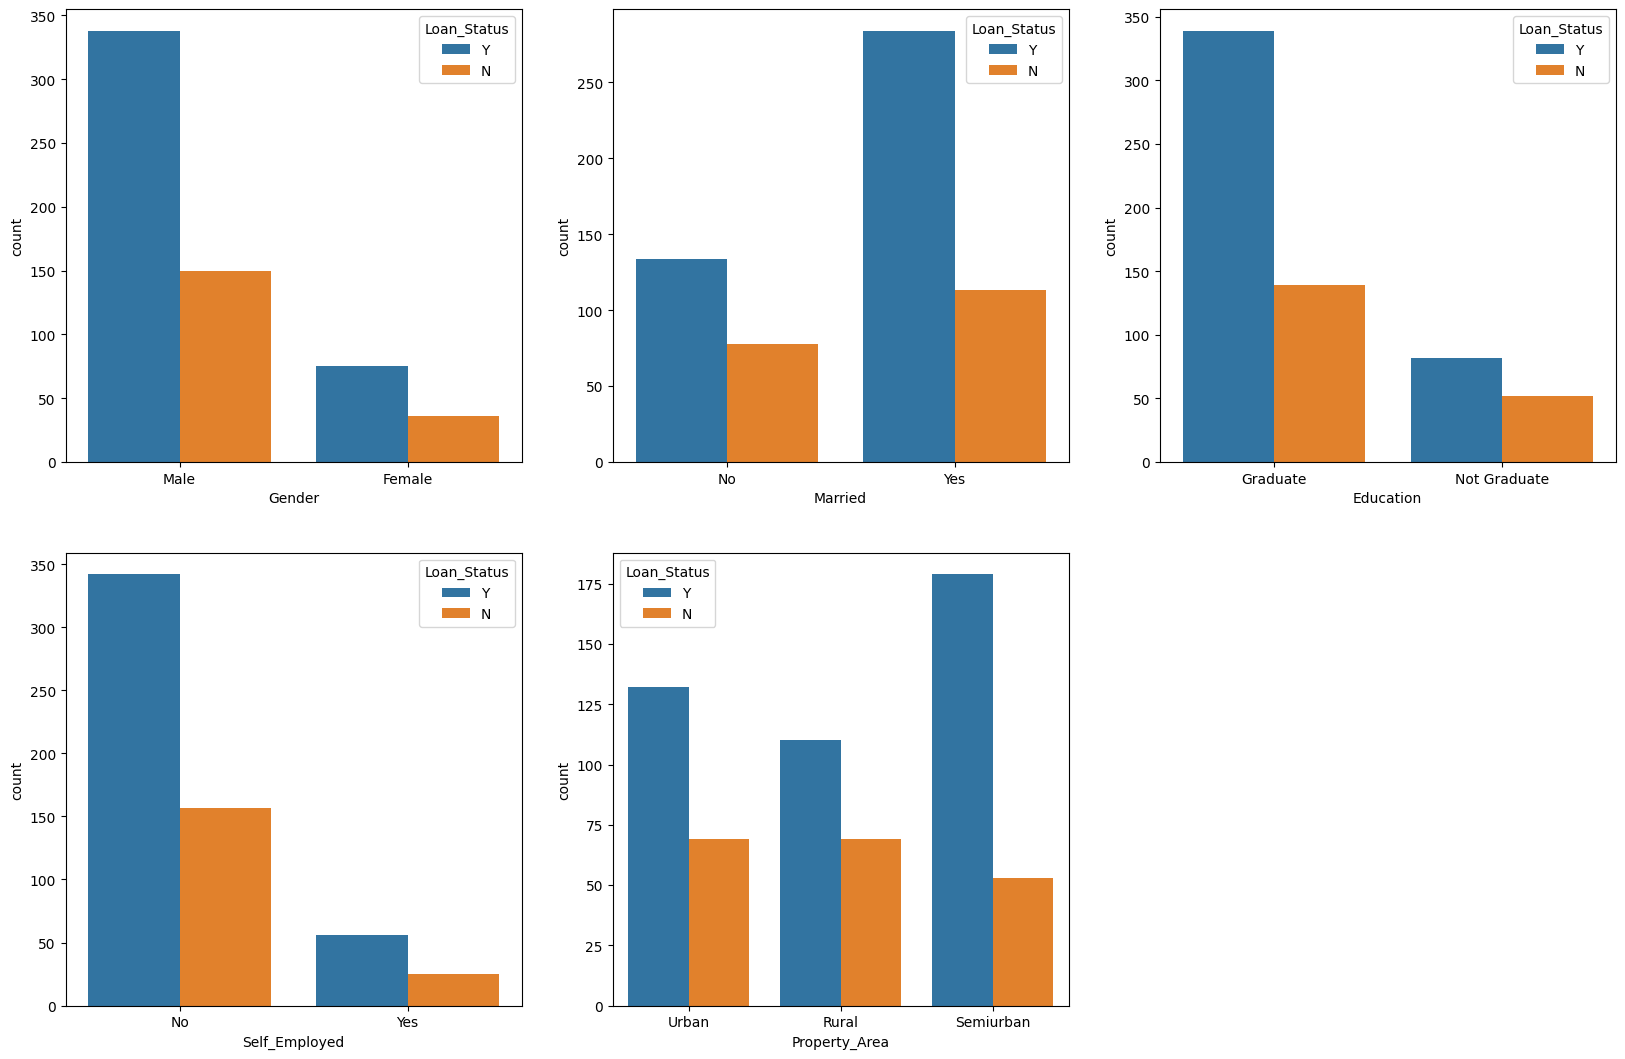

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=df)

plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=df)

plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=df)

plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

plt.show()


In [ ]:
# prompt: do onehot encoding for string data in dataset like below code for all string columns and replace those values in dataset also for 'Loan_Status'
df_Dependents = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

df_Gender = df.Gender.map({'Male':0,'Female':1})
df['Gender'].value_counts()

df_Married = df.Married.map({'Yes':0,'No':1})
df['Married'].value_counts()

df_Education = df.Education.map({'Graduate':0,'Not Graduate':1})
df['Education'].value_counts()

df_Self_Employed = df.Self_Employed.map({'Yes':0,'No':1})
df['Self_Employed'].value_counts()

df_Property_Area = df.Property_Area.map({'Urban':0,'Semiurban':1,'Rural':2})
df['Property_Area'].value_counts()

df_Loan_Status = df.Loan_Status.map({'Y':0,'N':1})
df['Loan_Status'].value_counts()

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.366102,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df.Married

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
607    0.0
608    0.0
609    1.0
610    0.0
611    0.0
Name: Married, Length: 552, dtype: float64

In [ ]:
# prompt: replace converted string data in dataset using pandas replace and ommit null values print ir

df = df.replace({'Gender': {'Male': 0, 'Female': 1},
                     'Married': {'Yes': 0, 'No': 1},
                     'Education': {'Graduate': 0, 'Not Graduate': 1},
                     'Self_Employed': {'Yes': 0, 'No': 1},
                     'Property_Area': {'Urban': 0, 'Semiurban': 1, 'Rural': 2},
                     'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
                      'Loan_Status':{'Y':0,'N':1}})
df = df.dropna()
print(df)


      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001002     0.0      1.0         0.0          0            1.0   
1    LP001003     0.0      0.0         1.0          0            1.0   
2    LP001005     0.0      0.0         0.0          0            0.0   
3    LP001006     0.0      0.0         0.0          1            1.0   
4    LP001008     0.0      1.0         0.0          0            1.0   
..        ...     ...      ...         ...        ...            ...   
607  LP002964     0.0      0.0         2.0          1            1.0   
608  LP002974     0.0      0.0         0.0          0            1.0   
609  LP002978     1.0      1.0         0.0          0            1.0   
610  LP002979     0.0      0.0         3.0          0            1.0   
611  LP002983     0.0      0.0         1.0          0            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.366102           

In [ ]:
# prompt: split the data
x=df.iloc[:,1:-1]
y = df['Loan_Status']  # the last column

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0)


In [ ]:
# prompt: train usiing logistic regression and test with test data and find accuracy

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8188405797101449


In [ ]:
# prompt: check accuracy confusion matrix, precision, recall,

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Accuracy: 0.8188405797101449
Confusion matrix:
 [[95  1]
 [24 18]]
Precision: 0.9473684210526315
Recall: 0.42857142857142855
